In [85]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 윈도우 기본 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지


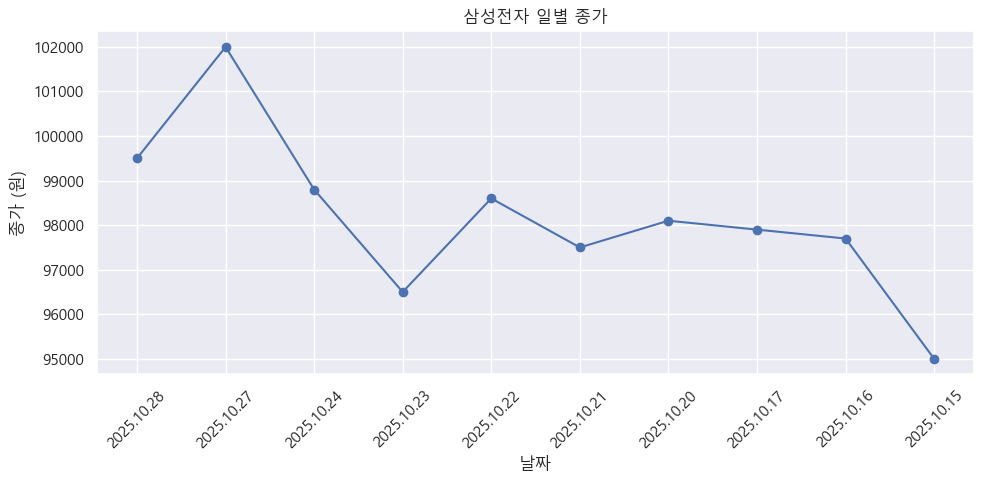

In [87]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# 삼성전자 종목코드
code = '005930'
url = f'https://finance.naver.com/item/sise_day.naver?code={code}&page=1'

headers = {
    'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Mobile Safari/537.36'
}

# 요청 및 파싱
res = requests.get(url, headers=headers)
res.encoding = 'euc-kr'  # 네이버 증권은 EUC-KR 인코딩
soup = BeautifulSoup(res.text, 'html.parser')

# 데이터 추출
dates = []
prices = []

table = soup.find('table', class_='type2')
rows = table.find_all('tr')

for row in rows:
    cols = row.find_all('td')
    if len(cols) >= 7 and cols[1].text.strip():  # 날짜와 종가가 있는 행만
        date = cols[0].text.strip()
        price = cols[1].text.strip().replace(',', '')
        dates.append(date)
        prices.append(int(price))

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(dates, prices, marker='o')
plt.xticks(rotation=45)
plt.title('삼성전자 일별 종가')
plt.xlabel('날짜')
plt.ylabel('종가 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()

